<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

# <center> Machine Learning </center>
# <center> Practical Work 1: Recognizing Iris flowers </center>
### <center> Vitor Gama Lemos </center>

# 1. Introduction

<p style="text-align: justify;">This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).</p>

<p style="text-align: justify;">The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.</p>

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familiarized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

## Python Libraries 

In the first place, Let's define some libraries to help us in the manipulation the data set, such as `numpy`, `matplotlib`, `seaborn` and `scikit-learn`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

## An analysis about the problem 

Before, It is necessary define some things about problem. First, We have 4-inputs related each ``y`` output. Our number of instances is equal to 150 samples (50 in each of three classes to classification).
* **The x inputs are arranged as follows:** 
     - For $x[0]$ : Sepal Width in cm
     - For $x[1]$ : Sepal Length in cm
     - For $x[2]$ : Petal Width in cm
     - For $x[3]$ : Petal Length in cm
     
* **The y outputs are arranged as follows:**
     - $if$ $y = 0$, $then$: Iris-Setosa
     - $if$ $y = 1$, $then$: Iris-Versicolour 
     - $if$ $y = 2$, $then$: Iris-Virginica
     
* ** Algorithms used in this work:**
     - An Artificial Neural Network called **Multilayer Perceptron**
     - An Logistic Regression called **Multinomial Logistic Regression**
     
 

In [2]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

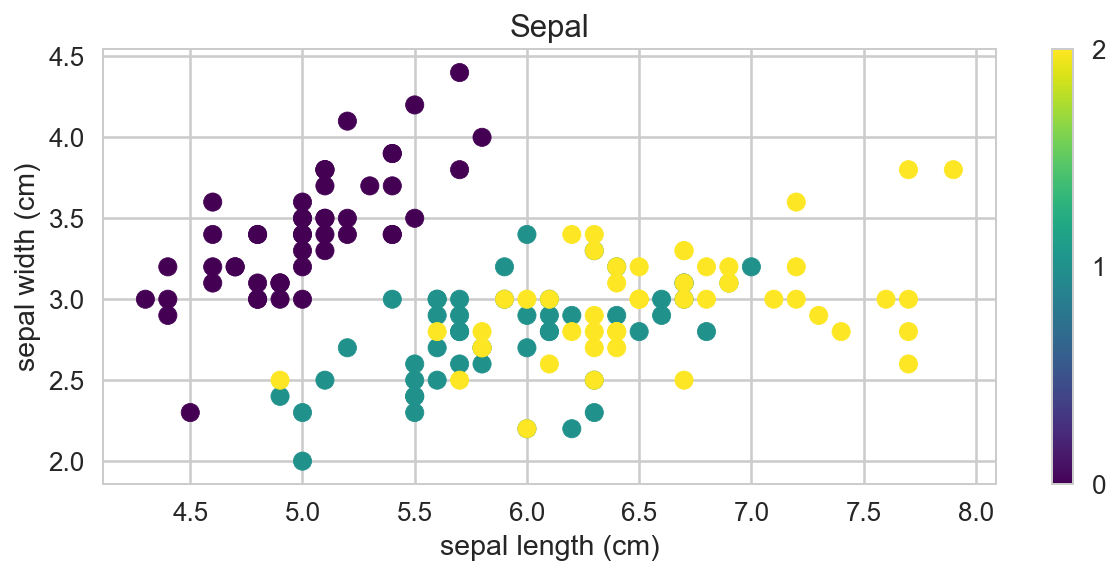

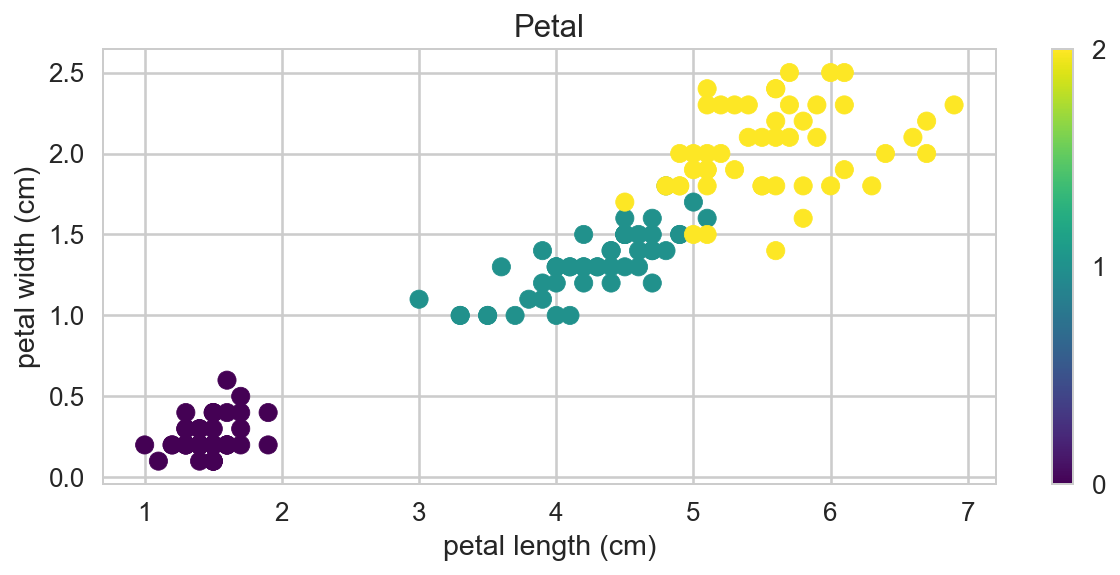

In [3]:
n_samples, n_features = iris_data.data.shape

def Show_Diagram(x_label,y_label,title):
    plt.figure(figsize=(10,4))
    plt.scatter(iris_data.data[:,x_label], iris_data.data[:,y_label], c=iris_data.target, cmap=cm.viridis)
    plt.xlabel(iris_data.feature_names[x_label]); plt.ylabel(iris_data.feature_names[y_label]); plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]));plt.show();x_label = 2;y_label=3;title='Petal'

Show_Diagram(0,1,'Sepal')
Show_Diagram(2,3,'Petal')

## Separate and analyze our iris data-set 

It is here that we will select our samples to train and test the algorithms. 
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='data.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

In [4]:
random.seed(123)

def separate_data():
    #Neste método os dados são separados com base em intervalos. 
    #Então, o método irá selecionar uma mesma quantidade de amostras para cada classe'
    #80% é a porcentagem de amostras selecionadas para treinamento e 20% para teste'
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test


'Aqui você pode alterar o tamanho das amotras Train-Samples e Teste-Samples'
train_porcent = 80 # Porcentagem de amostras de treino 
test_porcent = 20 # Porcentagem de amostras de teste
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Junção entre a coluna X e Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

arquivo_train,arquivo_test = separate_data()

'Separar as amostras de entrada e suas respectivas saidas'
train_X = np.array([indice[:4] for indice in arquivo_train])
train_y = np.array([indice[4] for indice in arquivo_train])
test_X = np.array([indice[:4] for indice in arquivo_test])
test_y = np.array([indice[4] for indice in arquivo_test])

## Show training iris data-set

Text(0,0.5,'petal width (cm)')

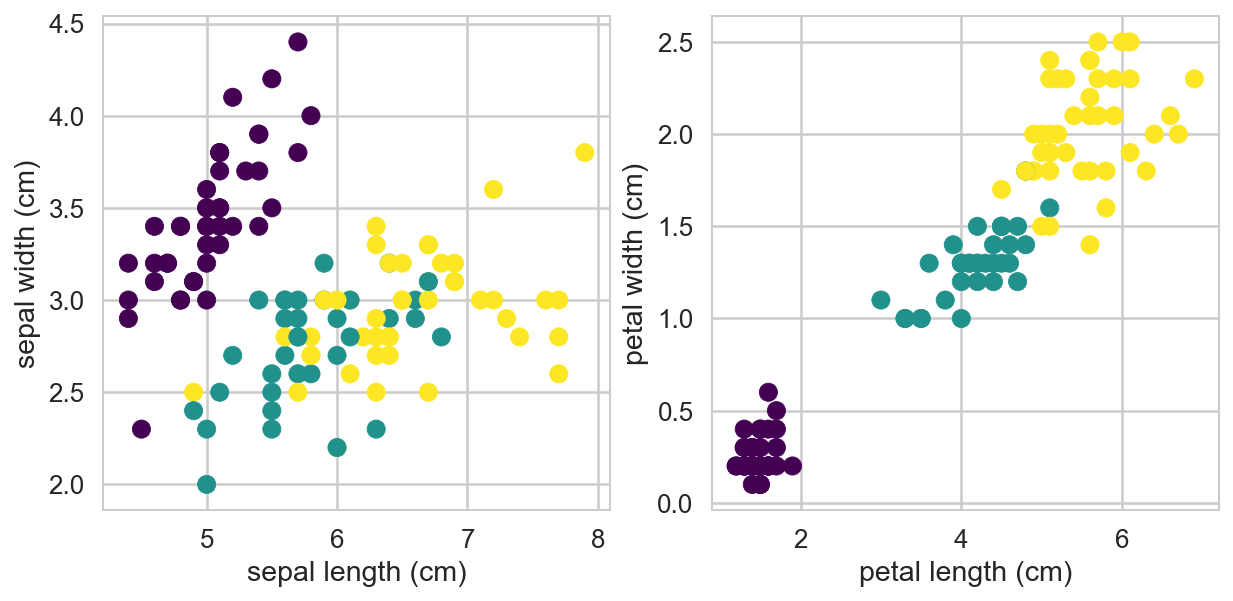

In [5]:
plt.figure(figsize=(10,10));plt.subplot(2,2,3)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0]); plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(2,2,4);plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2]); plt.ylabel(iris_data.feature_names[3])

## Show test iris data-set 

Text(0,0.5,'petal width (cm)')

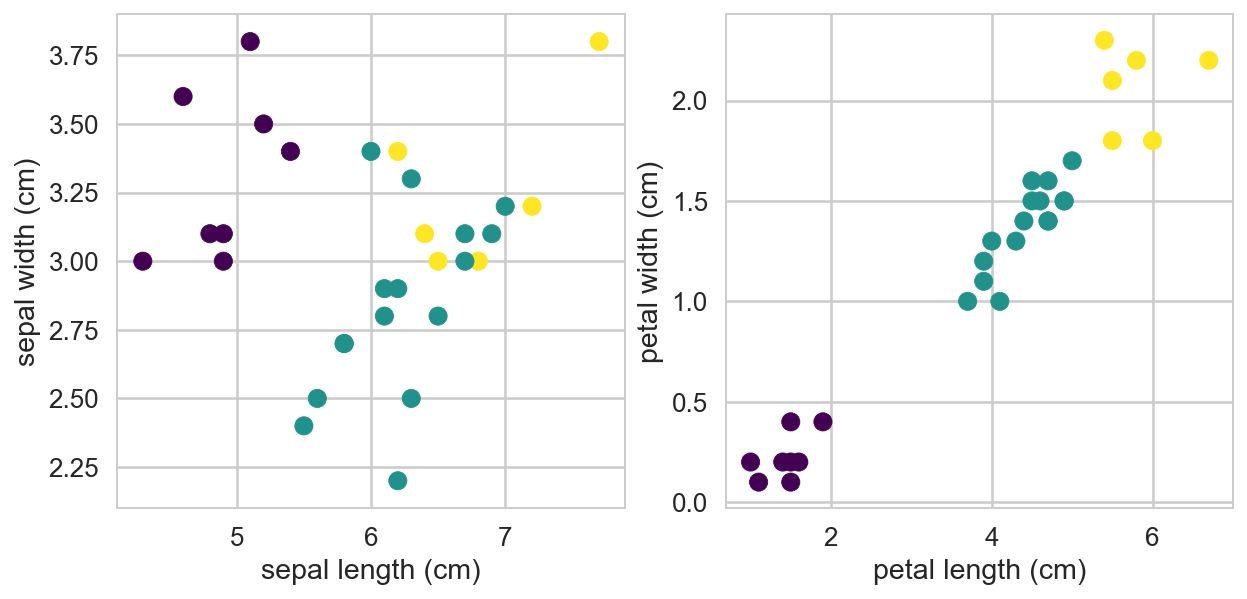

In [6]:
plt.figure(figsize=(10,10));plt.subplot(2,2,1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0]); plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(2,2,2);plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2]); plt.ylabel(iris_data.feature_names[3])

# Multinomial Logistic Regression (Softmax Regression)

<p style="text-align: justify;"> In statistics, multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes. That is, it is a model that is used to predict the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables (which may be real-valued, binary-valued, categorical-valued, etc.).</p>

<p style="text-align: justify;"> **Multinomial logistic regression ** is known by a variety of other names, including polytomous LR, multiclass LR, softmax regression, multinomial logit, maximum entropy (MaxEnt) classifier, conditional maximum entropy
model.</p>

<p style="text-align: justify;"> ** More information about it: [Softmax Regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)** </p> 
<div class="container-fluid">
  <div class="row">
      <img width='70%' height='70%' src='multinominal.png'/>
  </div>
</div>


## How does Multinomial logistic classifier work? 
### Step 1. Get Z value
<p style="text-align: justify;"> First , Let's get **z** value :
$\text Z = \sum_{i=0}^n w_i x_i\, = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n $</p>

### Step 2. Cost Function J
<p style="text-align: justify;">  It is function that we need to minimize, which it is calculated as follow:</p>
$$\text J(W) = \frac{1}{n} \sum_{i=0}^n H(T_i, O_i) $$

where, $ H(T_i, O_i)$ or cross-entropy is defined as: 
$$\text H(T_i, O_i) = - \sum_{n} T_i \cdot log(O_i) $$

### Step 3. Softmax Function 
<p style="text-align: justify;">The softmax function is used in various ** multiclass classification methods **, such as multinomial logistic regression, multiclass linear discriminant analysis, naive Bayes classifiers, and artificial neural networks.</p>
$$ p(y = j | x) = \frac{e^{z.T}}{\sum_{i = 1}^n {e^{z.T}}} $$
### Step 4. Learn using Gradient Descent 
<p style="text-align: justify;"> To this work, the implementation Softmax Regression using gradient descent that It is defined as: $ W_{ij} = W_{ij} - \gamma \cdot \nabla_{Wj}J(W) $ </p>Where :
$ \nabla_{Wj} J(W) $ is **cost derivative** defined as:
$$ \nabla_{Wj} J(W) = -\frac{1}{n} \sum_{i = 0}^n (X^{(i)} (T_i - O_i))$$

## Implementation Multinomial logistic (Softmax Regression)


<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='softmax.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>


In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

class Multinomial_Regression(BaseEstimator, ClassifierMixin): 
    def __init__(self, X, y,params=None):     
        'Valores default utilizados para treinamento' 
        if (params == None):
            self.learningRate = 0.005                  # Taxa de Aprendizado
            self.max_epocas = 3000                      # Máximo de Épocas 
        else:
            self.learningRate = params['LearningRate']
            self.max_epocas = params['Epocas']
           
        self.pesos = np.array([[0.1,0.2,0.3],
                               [0.1,0.2,0.3],
                               [0.1,0.2,0.3],
                               [0.1,0.2,0.3]])
    pass

    def cost_derivate_gradient(self,n,Ti,Oi, X):
        'Derivada do gradiente, conforme demonstrado na seção 2.1.4'
        result = -(np.dot(X.T,(Ti - Oi)))/n   
        return result 

    def function_cost_J(self,n,Ti,Oi):
        'Função custo, conforme demonstrado na seção 2.1.2'
        result = -(np.sum(Ti * np.log(Oi)))/n 
        return result
    
    def one_hot_encoding(self,Y):
        OneHotEncoding = []
        encoding = []
        for i in range(len(Y)):
            if(Y[i] == 0): encoding = np.array([1,0,0]) #Classe 1 ,Se y = 0
            elif(Y[i] == 1): encoding = np.array([0,1,0]) #Classe 2,Se y = 1
            elif(Y[i] == 2): encoding = np.array([0,0,1]) #Classe 3,Se y = 2

            OneHotEncoding.append(encoding)
        return OneHotEncoding
    
    def accuracy_graphic(self, grafico_respostas):
        labels = 'Acertos', 'Erros';sizes = [96.5, 3.3];explode = (0, 0.14);fig1, ax1 = plt.subplots()
        ax1.pie(grafico_respostas, explode=explode, colors=['green','red'],labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);ax1.axis('equal');plt.show()

    def softmax(self,z):
        'Função Softmax, conforme demonstrado na seção 2.1.3'
        soft = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T 
        return soft
    
    def show_probabilidade(self,vetor):
        print("Probabilidades: [ Classe 0 ,  Classe 1 , Classe 2 ]")
        print(vetor)
        
    def predict(self, X,y):
        acc_set = acc_vers = acc_virg = 0
        v_resp = [];n = len(y)
        Z = np.matmul(X,self.pesos)
        Oi = self.softmax(Z)
        previsoes = np.argmax(Oi,axis=1)
        self.show_probabilidade(Oi)
        print("")
        porcentagem = sum(previsoes == y)/n
        print(" ID-Amostra  | Classe pertencente |  Saida Prevista  |   Saida Esperada  ")  
        for i in range(len(previsoes)):
            if(previsoes[i] == 0): print(" id :",i,"          | Iris-Setosa        |  Output:",previsoes[i],"   |",y[i])
            elif(previsoes[i] == 1): print(" id :",i,"          | Iris-Versicolour   |  Output:",previsoes[i],"   |",y[i])
            elif(previsoes[i] == 2): print(" id :",i,"          | Iris-Virginica     |  Output:",previsoes[i],"   |",y[i])
                
        for i in range(len(previsoes)):
            if((previsoes[i] == y[i])and(previsoes[i] == 0)):acc_set+=1
            elif((previsoes[i] == y[i])and(previsoes[i] == 1)):acc_vers+=1
            elif((previsoes[i] == y[i])and(previsoes[i] == 2)):acc_virg+=1
               
        correto = porcentagem * 100;incorreto = 100 - correto
        v_resp.append(correto); v_resp.append(incorreto)
        self.accuracy_graphic(v_resp)
        return "%.2f"%(correto),acc_set,acc_vers,acc_virg

    def show_err_graphic(self,v_epoca,v_erro):
        plt.figure(figsize=(9,4));plt.plot(v_epoca, v_erro, "m-")
        plt.xlabel("n Epocas");plt.ylabel("Erro");plt.title("Minimização do Erro")
        plt.show()

    def fit(self,X,y):
        v_epocas = [];erroTotal = []
        contEpocas = 0;n = len(X)
        while(contEpocas < self.max_epocas):
            Ti = self.one_hot_encoding(y)
            Z = np.matmul(X,self.pesos)
            Oi = self.softmax(Z)
            erro = self.function_cost_J(n,Ti,Oi)
            gradiente = self.cost_derivate_gradient(n,Ti,Oi,X)
            self.pesos = self.pesos - self.learningRate * gradiente
            if(contEpocas % 100 == 0):
                erroTotal.append(erro)
                v_epocas.append(contEpocas)
                print("Epoca ",contEpocas," Erro Total :",erro)
            
            contEpocas+=1
        
        self.show_err_graphic(v_epocas,erroTotal)
        return self

## "Training" with Softmax and Gradient Descent


Epoca  0  Erro Total : 1.39903368021
Epoca  100  Erro Total : 0.794474712029
Epoca  200  Erro Total : 0.670653875859
Epoca  300  Erro Total : 0.599464815302
Epoca  400  Erro Total : 0.553173129152
Epoca  500  Erro Total : 0.520182081403
Epoca  600  Erro Total : 0.495045761789
Epoca  700  Erro Total : 0.474925011396
Epoca  800  Erro Total : 0.458209239828
Epoca  900  Erro Total : 0.443921006458
Epoca  1000  Erro Total : 0.431433896531
Epoca  1100  Erro Total : 0.420328115503
Epoca  1200  Erro Total : 0.410311670894
Epoca  1300  Erro Total : 0.401174973771
Epoca  1400  Erro Total : 0.392763471425
Epoca  1500  Erro Total : 0.384960495082
Epoca  1600  Erro Total : 0.377676142963
Epoca  1700  Erro Total : 0.370839861714
Epoca  1800  Erro Total : 0.364395367674
Epoca  1900  Erro Total : 0.358297090785
Epoca  2000  Erro Total : 0.35250763437
Epoca  2100  Erro Total : 0.346995927958
Epoca  2200  Erro Total : 0.341735862416
Epoca  2300  Erro Total : 0.336705266811
Epoca  2400  Erro Total : 0.33

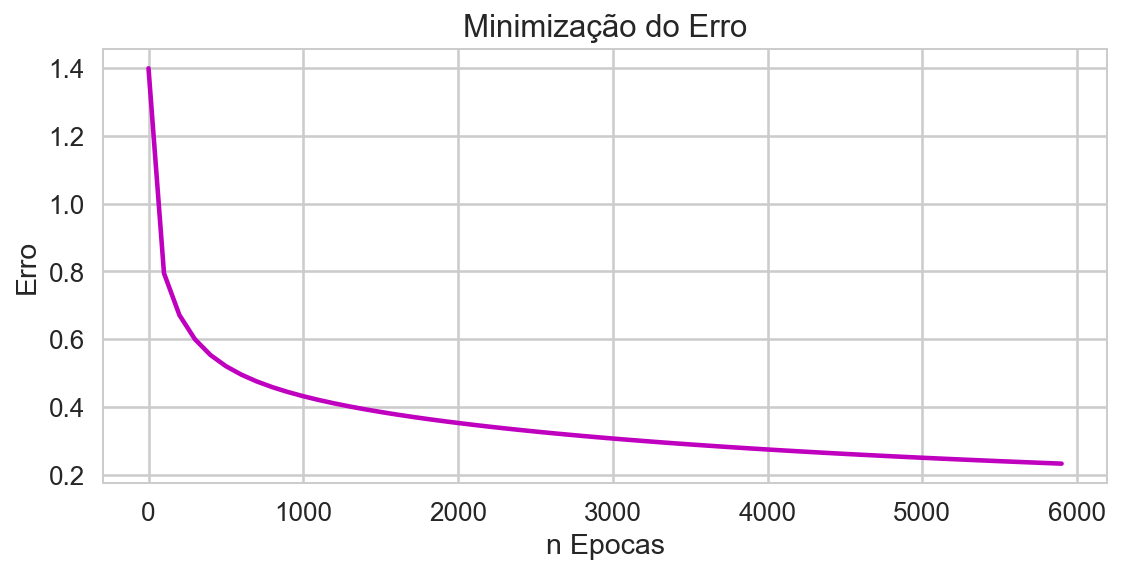

Multinomial_Regression(X=None, params=None, y=None)

In [8]:
parametros = {'Epocas':6000, 'LearningRate':0.005}
SoftmaxRegression = Multinomial_Regression(train_X,train_y,parametros)
SoftmaxRegression.fit(train_X,train_y)

##  Accuracy and precision the Multinomial Regression

Probabilidades: [ Classe 0 ,  Classe 1 , Classe 2 ]
[[  1.15883789e-01   7.98585505e-01   8.55307055e-02]
 [  2.35325798e-04   8.98098733e-02   9.09954801e-01]
 [  9.59419966e-01   4.05352284e-02   4.48053171e-05]
 [  4.23185440e-04   9.97289718e-02   8.99847843e-01]
 [  6.70069837e-04   1.60329738e-01   8.39000192e-01]
 [  9.90889522e-01   9.10811454e-03   2.36345596e-06]
 [  2.15071443e-04   1.46703534e-01   8.53081394e-01]
 [  3.73973373e-02   6.85016536e-01   2.77586126e-01]
 [  4.97467650e-03   3.46440173e-01   6.48585151e-01]
 [  9.75082393e-01   2.49034457e-02   1.41611053e-05]
 [  9.36696177e-01   6.31669223e-02   1.36900382e-04]
 [  8.69623962e-05   4.02519038e-02   9.59661134e-01]
 [  3.35376793e-04   1.87278963e-01   8.12385661e-01]
 [  4.88112008e-02   6.89639320e-01   2.61549480e-01]
 [  9.61355905e-01   3.85708726e-02   7.32225242e-05]
 [  8.08203904e-04   1.41827666e-01   8.57364130e-01]
 [  9.43873987e-01   5.59848475e-02   1.41165596e-04]
 [  1.35440986e-03   2.2999139

 id : 43           | Iris-Setosa        |  Output: 0    | 0.0
 id : 44           | Iris-Virginica     |  Output: 2    | 2.0
 id : 45           | Iris-Setosa        |  Output: 0    | 0.0
 id : 46           | Iris-Setosa        |  Output: 0    | 0.0
 id : 47           | Iris-Virginica     |  Output: 2    | 2.0
 id : 48           | Iris-Virginica     |  Output: 2    | 2.0
 id : 49           | Iris-Virginica     |  Output: 2    | 2.0
 id : 50           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 51           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 52           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 53           | Iris-Virginica     |  Output: 2    | 2.0
 id : 54           | Iris-Setosa        |  Output: 0    | 0.0
 id : 55           | Iris-Virginica     |  Output: 2    | 2.0
 id : 56           | Iris-Virginica     |  Output: 2    | 2.0
 id : 57           | Iris-Setosa        |  Output: 0    | 0.0
 id : 58           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 59

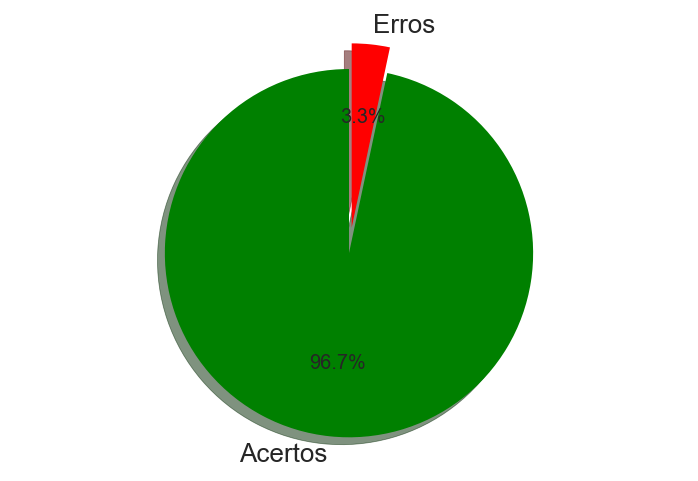

Porcentagem acertos (Treino):  96.67 % acertos


In [9]:
acc_train, train_set,train_vers,train_virg = SoftmaxRegression.predict(train_X,train_y)
print("Porcentagem acertos (Treino): ", acc_train,"% acertos")

Probabilidades: [ Classe 0 ,  Classe 1 , Classe 2 ]
[[  9.48624041e-01   5.12819716e-02   9.39874928e-05]
 [  4.04453701e-02   7.36096784e-01   2.23457846e-01]
 [  1.24229654e-02   5.83800511e-01   4.03776523e-01]
 [  9.23624002e-01   7.62071441e-02   1.68853707e-04]
 [  1.58379347e-02   6.65609913e-01   3.18552152e-01]
 [  2.32342772e-02   6.33820269e-01   3.42945454e-01]
 [  1.66036764e-02   7.29992727e-01   2.53403597e-01]
 [  5.70178365e-02   7.79533404e-01   1.63448760e-01]
 [  9.60371720e-01   3.95891976e-02   3.90828004e-05]
 [  3.52525960e-04   1.90934366e-01   8.08713108e-01]
 [  1.06216714e-03   2.18986394e-01   7.79951439e-01]
 [  4.76638345e-02   8.15317391e-01   1.37018774e-01]
 [  5.64288263e-02   7.62909285e-01   1.80661889e-01]
 [  3.39084253e-02   8.27527524e-01   1.38564051e-01]
 [  9.40399486e-01   5.95068975e-02   9.36163285e-05]
 [  9.70438013e-04   3.15398548e-01   6.83631014e-01]
 [  3.58258467e-03   4.31044618e-01   5.65372798e-01]
 [  4.27647798e-02   7.8505515

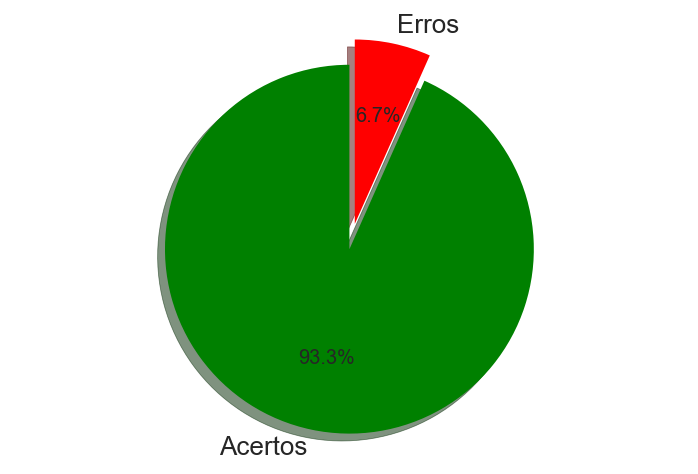

Porcentagem acertos (Teste):  93.33 % acertos


In [10]:
acc_test,test_set,test_vers,test_virg = SoftmaxRegression.predict(test_X,test_y)
print("Porcentagem acertos (Teste): ", acc_test,"% acertos")

## Score Iris-Flowers dataset

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 87.50 %
- Acurracy Iris-Virginica: 100.00 %


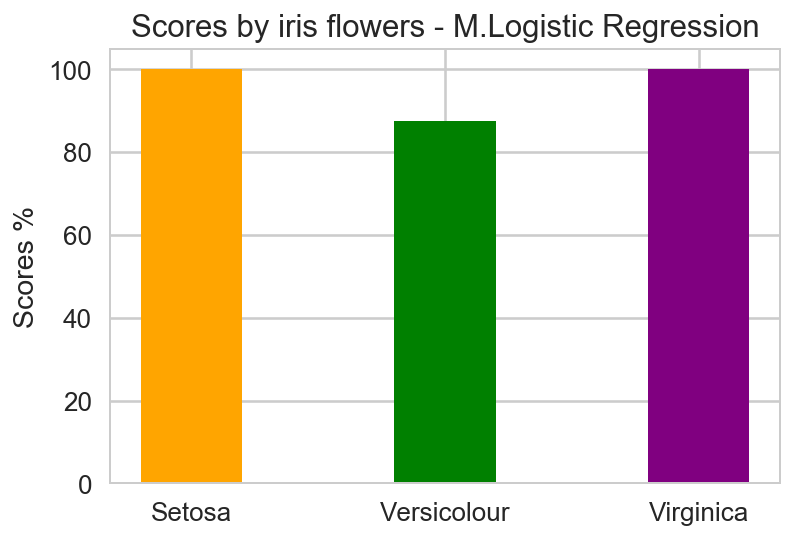

In [11]:
n_set = 0;n_vers = 0;n_virg = 0;
for i in range(len(test_y)):
    if(test_y[i] == 0):n_set+=1
    elif(test_y[i] == 1):n_vers+=1
    elif(test_y[i] == 2):n_virg+=1
        
ac_set = (test_set/n_set)*100
ac_vers = (test_vers/n_vers)*100
ac_virg = (test_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%ac_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%ac_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%ac_virg, "%")
ig, ax = plt.subplots();names = ["Setosa","Versicolour","Virginica"];x1 = [2.0,4.0,6.0]
plt.bar(x1[0], ac_set,color='orange');plt.bar(x1[1], ac_vers,color='g')
plt.bar(x1[2], ac_virg,color='purple',label='Iris-Virginica');plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - M.Logistic Regression');plt.show()

# Artificial Neural Network (ANN)

<p style="text-align: justify;">Artificial neural networks (ANNs) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming. For example, in image recognition, they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the analytic results to identify cats in other images.</p>

<p style="text-align: justify;">They have found most use in applications difficult to express in a traditional computer algorithm using rule-based programming.An ANN is based on a collection of connected units called artificial neurons, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.</p>

<p style="text-align: justify;"> ** More information about it: [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)** </p> 

## Multilayer Perceptron - MLP

<p style="text-align: justify;">The Multilayer Perceptron Networks are characterized by the presence of many intermediate layers (hidden) in your structure, located between input layer and output layer [1]. With this, such networks have the advantage of being able to classify more than two different classes and It also solve non-linearly separable problems.</p>
<div class="container-fluid"><div class="row">
      <div class="col-md-2" align='center'></div>
      <div class='col-md-8' align='center'>
           <img src='http://ffden-2.phys.uaf.edu/212_fall2003.web.dir/Keith_Palchikoff/multilayer%20perceptron.JPG' />
      </div><div class="col-md-2" align='center'></div>
  </div>
</div>

## How does Multilayer Perceptron work? 

<p style="text-align: justify;"> We can summarize the operation of the perceptron as follows it:</p>

    - Step 1 : Initialize the weights and bias with small-randomized values;
    - Step 2 : Propagate all values in the input layer until output layer(Forward Propagation)
    - Step 3 : Update weight and bias in the inner layers(Backpropagation)
    - Step 4 : Do it until that the stop criterion is satisfied !
    
### Step 1. Forward propagation

In order to proceed we need to improve the notation we have been using. That for, for each layer $1\geq l\geq L$, the activations and outputs are calculated as:

$$\text{L}^l_j = \sum_i w^l_{ji} x^l_i\, = w^l_{j,0} x^l_0 + w^l_{j,1} x^l_1 + w^l_{j,2} x^l_2 + ... + w^l_{j,n} x^l_n,$$
$$Y^l_j = g^l(\text{L}^l_j)\,,$$

where:

* $y^l_j$ is the $j-$th output of layer $l$,
* $x^l_i$ is the $i$-th input to layer $l$,
* $w^l_{ji}$ is the weight of the $j$-th neuron connected to input $i$,
* $\text{L}^l_{j}$ is called net activation, and
* $g^l(\cdot)$ is the activation function of layer $l$.
 
### Step 2. Erro function 
It is used to measure performance locality associated with the results produced by the neurons in output layer and the expected result.
$$
E(k) = 
\frac{1}{2} \sum_{k=1}^{K}({{d_j(k)}} - {y_j}{(k)})^2.
$$

### Step 3. Backpropagation (In computing notation)
#### For output layer , ` L = 2`
   - `Step 1 : Calculate error in output layer:`$\delta^{(L2)} = -({d_j}^{(L2)} - {y_j}^{(L2)})\cdot g'({S_j}^{(L2)})$
   - `Step 2 : Update all weight between hidden and output layer:` $W^{(L2)} = W^{(L2)} -\gamma \cdot(\delta^{(L2)}  - {S_j}^{(L1)})$
   - `Step 3 : Update bias value in output layer:`$bias^{(L2)} = bias^{(L2)} - \gamma \cdot \delta^{(L2)}$
   
#### For input layer , ` L = 1`
   - `Step 4 : Calculate error in hidden layer:`$\delta^{(L1)} = W^{(L2)} \cdot \delta^{(L2)} \cdot g'({S_j}^{(L1)})$
   - `Step 5 : Update all weight between hidden and output layer:` $W^{(L1)} = W^{(L1)} -\gamma \cdot(\delta^{(L1)}  - {X_i})$
   - `Step 6 : Update bias value in output layer:`$bias^{(L1)} = bias^{(L1)} - \gamma \cdot \delta^{(L1)}$

## Implementation the Multilayer Perceptron 

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        'Valores default utilizados para treinamento do Perceptron MLP(Practical Work 1)' 
        if (params == None):
            self.inputLayer = 4                        # Camada de Entrada 
            self.hiddenLayer = 5                       # Camada Intermediária
            self.outputLayer = 3                       # Camada de Saida
            self.learningRate = 0.005                  # Taxa de Aprendizado
            self.max_epocas = 600                      # Máximo de Épocas 
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Função de ativação sigmoide
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epocas = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Inicialização dos pesos e bias em todas as camadas da rede'
        self.pesos_hidden = [[2  * random.random() - 1 for i in range(self.hiddenLayer)] for j in range(self.inputLayer)]
        self.pesos_output = [[2  * random.random() - 1 for i in range(self.OutputLayer)] for j in range(self.hiddenLayer)]
        self.bias_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.bias_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.numero_classes = 3 
        
    pass

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algoritmo(self, x):
        delta_output = []
        ' Etapa 1 - Cálculo de erro: OutputLayer'
        erro_output = self.saida_desejada - self.saidas_l2
        delta_output = ((-1)*(erro_output) * self.deriv(self.saidas_l2))
        
        ' Etapa 2 - Atualizar os pesos entre OutputLayer e HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.pesos_output[i][j] -= (self.learningRate * (delta_output[j] * self.saidas_l1[i]))
                self.bias_output[j] -= (self.learningRate * delta_output[j])
      
        ' Etapa 3 - Cálculo de erro: HiddenLayer'
        delta_hidden = np.matmul(self.pesos_output, delta_output)* self.deriv(self.saidas_l1)
 
        ' Etapa 4 - Atualizar os pesos entre HiddenLayer e InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.pesos_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.bias_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4));plt.plot(v_epoca, v_erro, "m-",color="b")
        plt.xlabel("n Epocas");plt.ylabel("Erro Quadrático Total");
        plt.title("Minimização do Erro Quadrático Total");plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        previsoes = []
        'Percorrer com os valores de X - Forward Propagation'
        forward = np.matmul(X,self.pesos_hidden) + self.bias_hidden
        forward = np.matmul(forward, self.pesos_output) + self.bias_output
                                 
        for i in forward:
            previsoes.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        print(" Número da Amostra  | Classe pertencente |  Saida Prevista  |   Saida Esperada  ")   
        for i in range(len(previsoes)):
            if(previsoes[i] == 0): print(" id :",i,"          | Iris-Setosa        |  Output:",previsoes[i],"   |",y[i])
            elif(previsoes[i] == 1): print(" id :",i,"          | Iris-Versicolour   |  Output:",previsoes[i],"   |",y[i])
            elif(previsoes[i] == 2): print(" id :",i,"          | Iris-Virginica     |  Output:",previsoes[i],"   |",y[i])
                
        return previsoes
        pass

    def fit(self, X, y):  
        cont_epocas = 1; erro_total = 0; n = len(X); 
        vetor_epoca = []; vetor_erro = []
        while(cont_epocas <= self.max_epocas):
            for idx,inputs in enumerate(X): 
                self.saida_desejada = np.zeros(self.numero_classes)
                'Etapa 1 - Processo de propagação adiante(Forward Propagation)'
                self.saidas_l1 = self.activation((np.dot(inputs, self.pesos_hidden) + self.bias_hidden.T))
                self.saidas_l2 = self.activation((np.dot(self.saidas_l1, self.pesos_output) + self.bias_output.T))
                'Binarização das classes'
                # Similar ao One-Hot-Encoding implementado em seções anteriores
                if(y[idx] == 0): 
                    self.saida_desejada = np.array([1,0,0]) #Classe 1 {1,0,0}
                elif(y[idx] == 1):
                    self.saida_desejada = np.array([0,1,0]) #Classe 2 {0,1,0}
                elif(y[idx] == 2):
                    self.saida_desejada = np.array([0,0,1]) #Classe 3 {0,0,1}
                
                'Etapa 2 - Cálculo do Erro Quadrático Total'
                erro_quadratico = 0
                for i in range(self.OutputLayer):
                    erro = (self.saida_desejada[i] - self.saidas_l2[i])**2
                    erro_quadratico = (erro_quadratico + (0.05 * erro))
                    erro_total = erro_total + erro_quadratico
         
                'Etapa 3 - Backpropagation : Atualizar Pesos das Camadas anteriores'
                self.Backpropagation_Algoritmo(inputs)
                
            erro_total = (erro_total / n)
            if((cont_epocas % 50 == 0)or(cont_epocas == 1)):
                print("Época ", cont_epocas, "- Erro Total: ",erro_total)
                vetor_erro.append(erro_total)
                vetor_epoca.append(cont_epocas)
                
            cont_epocas += 1
        self.show_err_graphic(vetor_erro,vetor_epoca)

        return self

## Finding the best parameters 

For find the best results were necessary  realize various tests with different values to the parameters. The graphs below denote the tests made to select the best configuration for the neural network.

In [13]:
def show_test():
    'Teste feito para encontrar os melhores resultados e parametros'
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7];plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "m-",color='b',label="node-3");l2, = plt.plot(ep1, h_4, "m-",color='g',label="node-4")
    l3, = plt.plot(ep1, h_5, "m-",color='r',label="node-5");plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("n Epocas");plt.ylabel("% respostas corretas");
    plt.title("Relação entre nodes na hidden layer e o desempenho da rede")
    
    ep2 = [0,100,200,300,400,500,600,700];tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121];plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "m-",color='b',label="Tang. Hiperbolica")
    l2 , = plt.plot(ep2, sigm, "m-",color='g',label="Sigmoide")
    l3 , = plt.plot(ep2, Relu, "m-",color='r',label="ReLu");plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("n Epocas");plt.ylabel("Erro Total");plt.title("Relação entre função de ativação e o desempenho da rede")
    
    fig, ax = plt.subplots();names = ["Tang. Hiperb.","Sigmoide","ReLU"];x1 = [2.0,4.0,6.0]
    plt.bar(x1[0],53.4,0.4,color='b');plt.bar(x1[1],96.7,0.4,color='g');plt.bar(x1[2],33.2,0.4,color='r')
    plt.xticks(x1,names);plt.ylabel('% respostas certas');plt.title('Taxa de acertos - activation functions')
    plt.show()

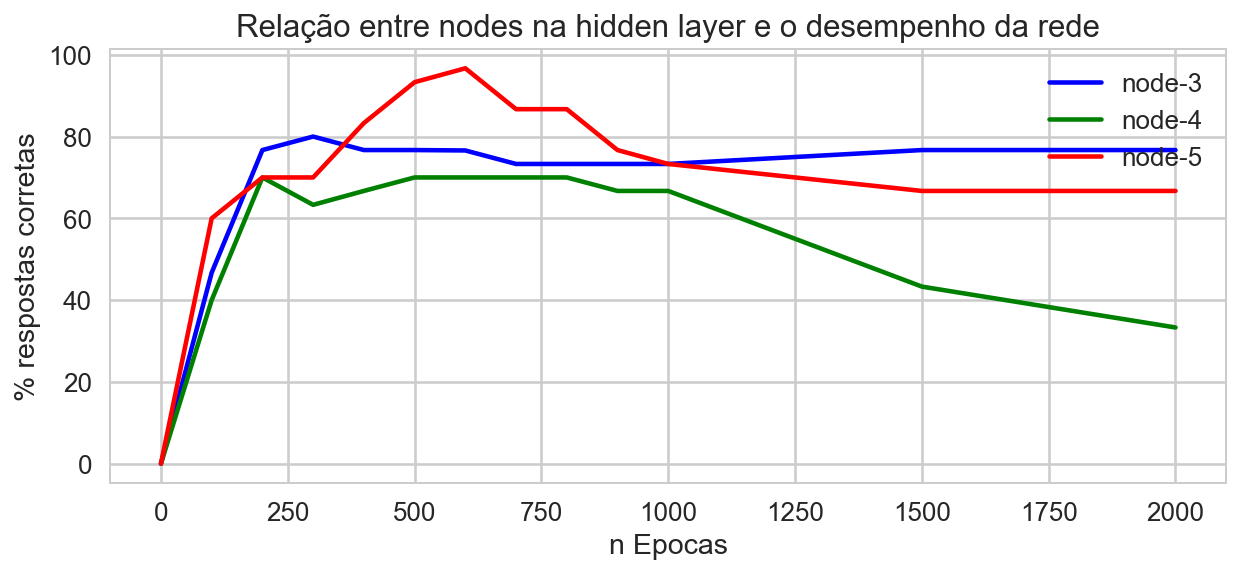

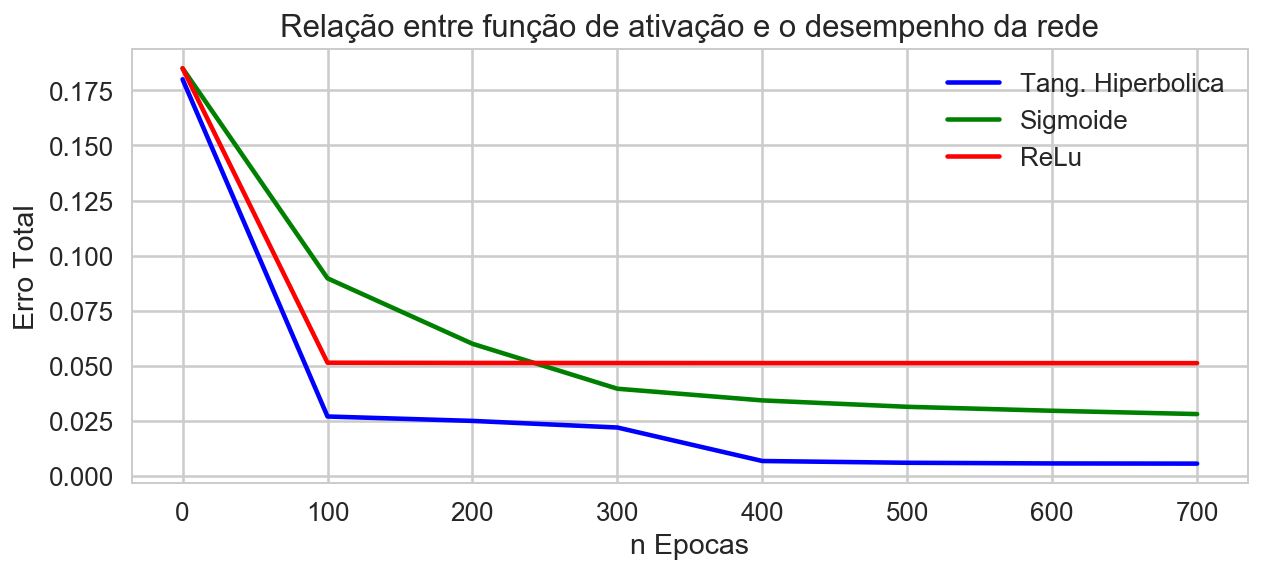

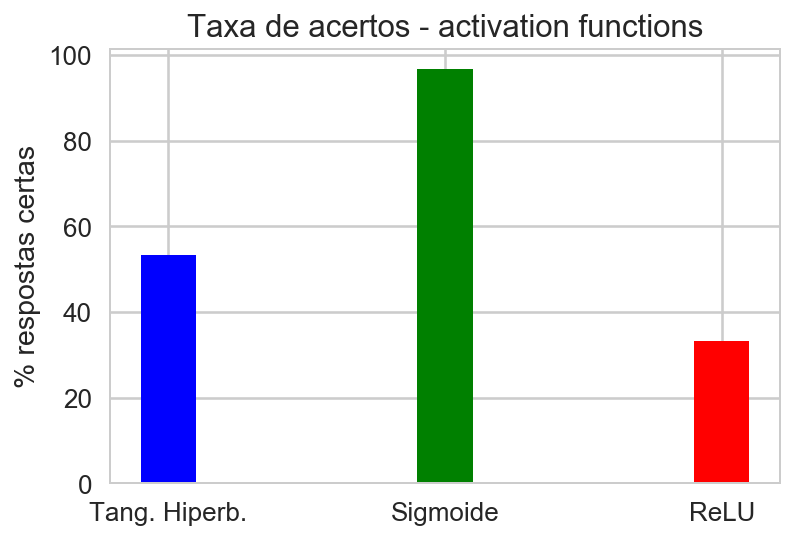

In [14]:
show_test()

# Training the Artificial Neural Network(MLP)

## Step 1. Training our MLP with the train dataset 

Época  1 - Erro Total:  0.0893635715002
Época  50 - Erro Total:  0.0537252823575
Época  100 - Erro Total:  0.0376783004669
Época  150 - Erro Total:  0.0311506500501
Época  200 - Erro Total:  0.0284007631219
Época  250 - Erro Total:  0.0266846404597
Época  300 - Erro Total:  0.0252309549691
Época  350 - Erro Total:  0.023835334418
Época  400 - Erro Total:  0.0224221611691
Época  450 - Erro Total:  0.0209679419754
Época  500 - Erro Total:  0.0194806788451
Época  550 - Erro Total:  0.0179732712133
Época  600 - Erro Total:  0.016422907059
Época  650 - Erro Total:  0.014827759473
Época  700 - Erro Total:  0.0133627504736


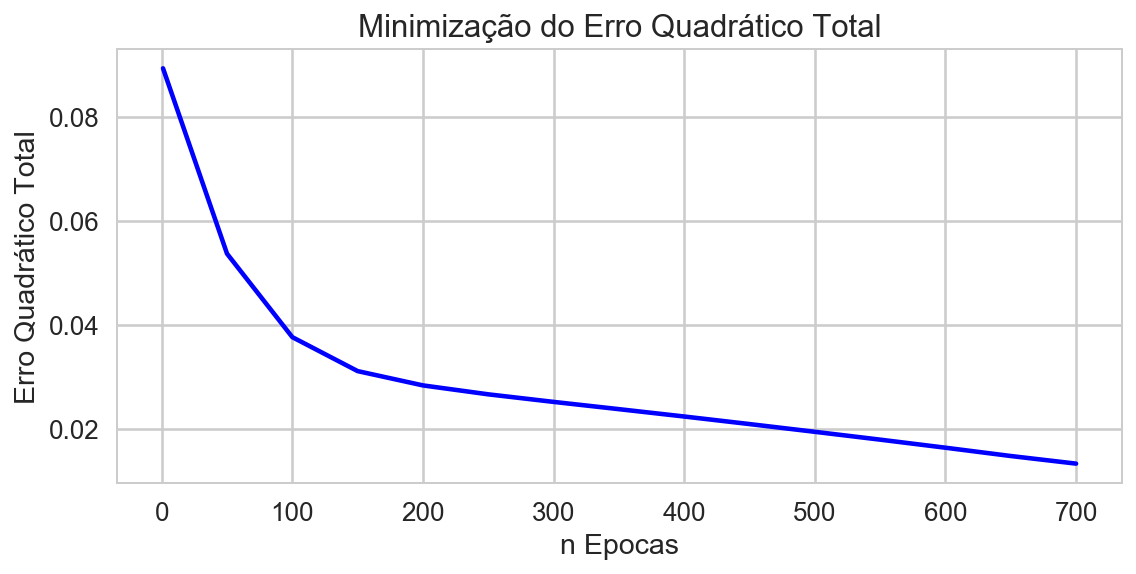

MultiLayerPerceptron(params=None)

In [15]:
dicionario = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dicionario)
Perceptron.fit(train_X,train_y)

## Step 2. Testing our results 

In [16]:
previsao = Perceptron.predict(test_X,test_y)
correto = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1
        
for i in range(len(test_y)):
    if (test_y[i] == previsao[i]): correto += 1
    if ((test_y[i] == previsao[i])and(test_y[i] == 0)):score_set += 1
    elif((test_y[i] == previsao[i])and(test_y[i] == 1)):score_vers += 1
    elif((test_y[i] == previsao[i])and(test_y[i] == 2)):score_virg += 1    
       
    
correto = (correto / len(test_y))*100
incorreto = 100 - correto

 Número da Amostra  | Classe pertencente |  Saida Prevista  |   Saida Esperada  
 id : 0           | Iris-Setosa        |  Output: 0    | 0.0
 id : 1           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 2           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 3           | Iris-Setosa        |  Output: 0    | 0.0
 id : 4           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 5           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 6           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 7           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 8           | Iris-Setosa        |  Output: 0    | 0.0
 id : 9           | Iris-Virginica     |  Output: 2    | 2.0
 id : 10           | Iris-Virginica     |  Output: 2    | 2.0
 id : 11           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 12           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 13           | Iris-Versicolour   |  Output: 1    | 1.0
 id : 14           | Iris-Setosa        |  Output: 0    | 0.0

## Step 3. Accuracy and precision the Multilayer Perceptron

Porcentagem: 96.67 % acertos e 3.33 % erros
O total de amostras teste é  150
*Iris-Setosa: 8 amostras
*Iris-Versicolour: 16 amostras
*Iris-Virginica: 6 amostras


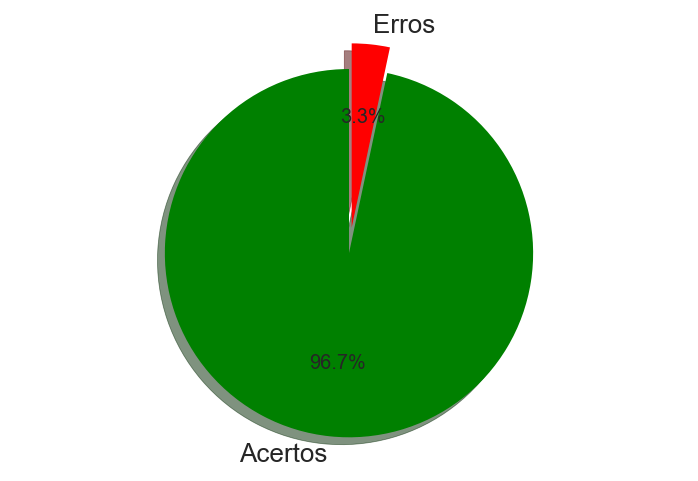

In [17]:
grafico_acertos = [];print("Porcentagem:","%.2f"%(correto),"% acertos","e","%.2f"%(incorreto),"% erros")
print("O total de amostras teste é ",n_samples);print("*Iris-Setosa:",n_set,"amostras")
print("*Iris-Versicolour:",n_vers,"amostras");print("*Iris-Virginica:",n_virg,"amostras")
grafico_acertos.append(correto);grafico_acertos.append(incorreto);labels = 'Acertos', 'Erros';
sizes = [96.5, 3.3];explode = (0, 0.14);fig1, ax1 = plt.subplots();
ax1.pie(grafico_acertos, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90);ax1.axis('equal');plt.show()

## Step 4. Score for each one of the samples

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 93.75 %
- Acurracy Iris-Virginica: 100.00 %


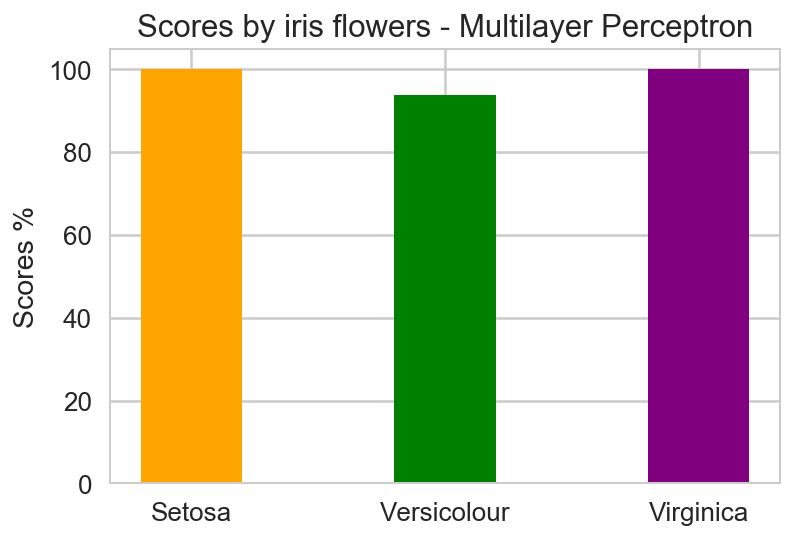

In [18]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"];x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots();r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica');plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron');plt.show()

# Multilayer Perceptron vs Multinomial Regression 

Red : Multilayer Perceptron
Blue : Multinomial Logistic Regression


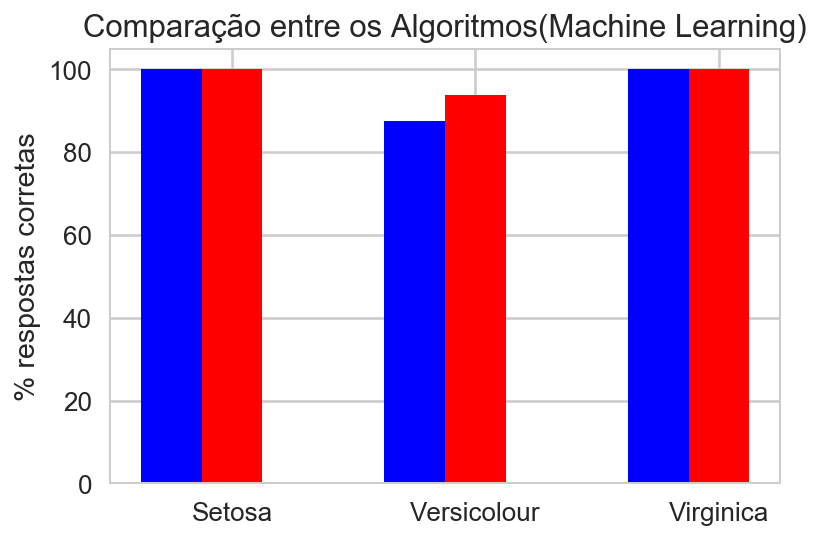

In [19]:
names = ["Setosa", "Versicolour", "Virginica"]
data = [[acc_set, acc_vers, acc_virg], #Perceptron
        [ac_set, ac_vers, ac_virg],] #Logistic Regression
plt.title('Comparação entre os Algoritmos(Machine Learning)');plt.ylabel('% respostas corretas');x1 = [2.0, 4.0, 6.0]
x2 = [x - 0.5 for x in x1];plt.xticks(x1, names);plt.bar(x2, data[1],0.5,color="blue", label="Logistic")
plt.bar(x1, data[0], width=0.5,color="red", label="MLP");print('Red : Multilayer Perceptron')
print('Blue : Multinomial Logistic Regression')

## References

**[1]** SILVA, Ivan Nunes da; SPATTI, Danilo Hernane; FLAUZINO, Rogério Andrade.**Redes Neurais Artificiais para engenharia e ciências aplicadas**. São Paulo: Artliber, 2010. 399 p. 

**[2]** BROWNLEE, Jason. ** Overfitting and Underfitting With Machine Learning Algorithms(2016)**. Site: [Machine Learning Mastery](https://machinelearningmastery.com/)